In [ ]:
!pip install torchvision ipyplot txtai[all] > /dev/null

# Get test data
!wget -N https://github.com/neuml/txtai/releases/download/v3.5.0/tests.tar.gz
!tar -xvzf tests.tar.gz

In [ ]:
import glob

from PIL import Image

from txtai.embeddings import Embeddings
from txtai.pipeline import Caption

In [ ]:
caption = Caption()

![image.png](https://github.com/openai/CLIP/raw/main/CLIP.png)

CLIP (Contrastive Language-Image Pre-Training) is a neural network trained on a variety of (image, text) pairs. It can be instructed in natural language to predict the most relevant text snippet, given an image, without directly optimizing for the task, similarly to the zero-shot capabilities of GPT-2 and 3.


There are open source models available that come close to above models, which will be used in this discussion

https://github.com/mlfoundations/open_clip

https://huggingface.co/docs/transformers/model_doc/clip


In [5]:
tabular_data = []

for path in glob.glob('txtai/*jpg'):
  # Add image object along with image metadata
  image = Image.open(path)
  tabular_data.append((path, {"object": image, 
                             "format": image.format, 
                             "width": image.width, 
                             "height": image.height, 
                             "caption": caption(image)
                             }, None))

In [ ]:
# Index with content and objects
embeddings = Embeddings({"method": "sentence-transformers", 
                         "path": "sentence-transformers/clip-ViT-B-32", 
                         "content": True, "objects": "image"})

embeddings.index(tabular_data)

In [ ]:
embeddings.search("select id, object, format, width, height, caption from txtai")

In [10]:
results = embeddings.search(f"select object from txtai where similar('Universe is big')", 2)

In [16]:
result_obj = [result['object'] for result in results]

In [13]:
import ipyplot
from PIL import Image


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


/usr/local/lib/python3.9/dist-packages/ipyplot/_utils.py:95: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))



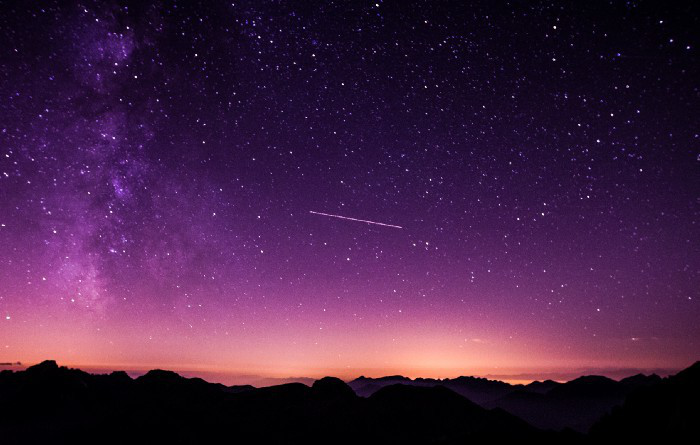
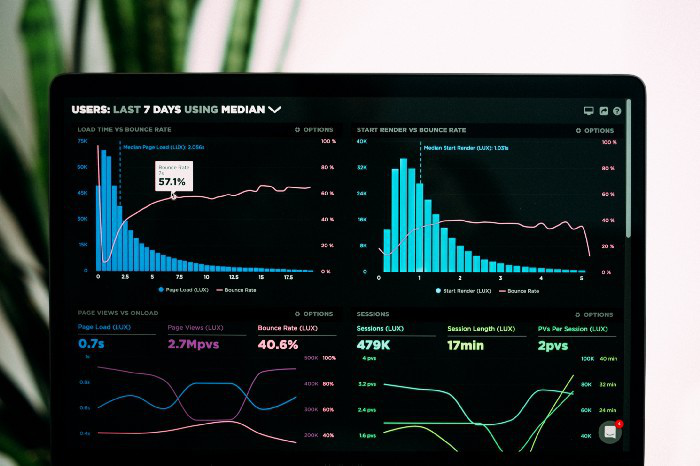


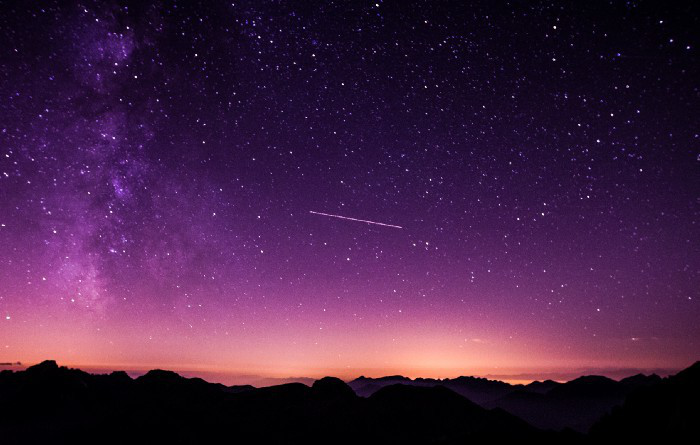
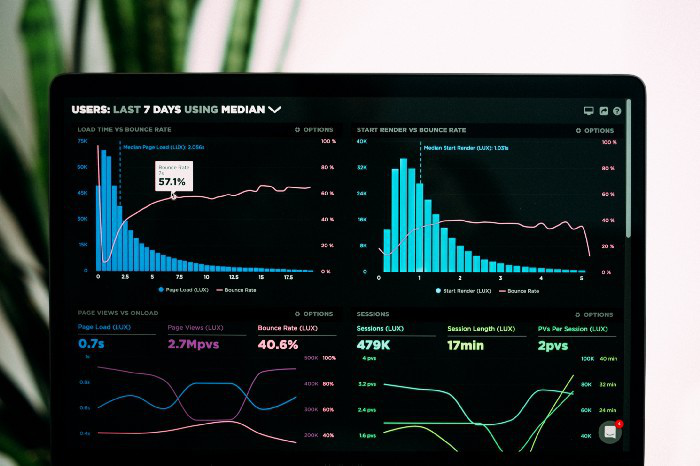

In [17]:
ipyplot.plot_images(result_obj,['Universe is Big','Big Universe'],
                    img_width=425,force_b64=True)

In [20]:
!pip -q install datasets > /dev/null

kaggle datasets download -d paramaggarwal/fashion-product-images-small

Fashion Product Images (Small)
44000 products with category labels and images.

Thanks to the dataset maintained by ashraq in Huggingface Hub.
    "ashraq/fashion-product-images-small"

In [ ]:
from datasets import load_dataset

# load the dataset from huggingface datasets hub
image_data = load_dataset(
    "ashraq/fashion-product-images-small",
    split="train"
)

In [25]:
image_data

Dataset({
    features: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName', 'image'],
    num_rows: 44072
})

In [26]:
#We want image, and the caption that is already provided to it
given_captions = image_data["productDisplayName"]
images = image_data['image']

In [27]:
given_captions[0]

'Turtle Check Men Navy Blue Shirt'

In [ ]:
ipyplot.plot_images(images[0:10],given_captions[0:10],
                    img_width=75,force_b64=True)

In [35]:
image_data[0]

{'id': 15970,
 'gender': 'Men',
 'masterCategory': 'Apparel',
 'subCategory': 'Topwear',
 'articleType': 'Shirts',
 'baseColour': 'Navy Blue',
 'season': 'Fall',
 'year': 2011.0,
 'usage': 'Casual',
 'productDisplayName': 'Turtle Check Men Navy Blue Shirt',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=60x80 at 0x7F6EC2177F10>}

### making the data ready to embed...

In [37]:
fashion_data = []

for img in image_data:
  # Add image object along with image metadata
  fashion_data.append((path, {"object": img['image'], 
                             "format": img['image'].format, 
                             "width": img['image'].width, 
                             "height": img['image'].height, 
                             "caption": img['productDisplayName']
                             }, None))

In [38]:
fashion_index = Embeddings({"method": "sentence-transformers", 
                         "path": "sentence-transformers/clip-ViT-B-32", 
                         "content": True, 
                         "objects": "image"})

In [ ]:
fashion_index.index(fashion_data)

In [ ]:
fashion_index.save("fashion_data_index")

In [ ]:
#searching the index...

search_result = fashion_index.search("select object, caption from txtai where similar('Men Blue Shirt')",5)

In [ ]:
fashion_obj = [result['object'] for result in search_result]
fashion_capts = [result['caption'] for result in search_result]

In [ ]:
ipyplot.plot_images(fashion_obj,fashion_capts,
                    img_width=75,force_b64=True)